# Rice Classification Project PART I: Textual Data Analysis

## 1. Introduction

In this part of the project, we classify rice species based on their features using 4 method :

**k-Nearest Neighbor(kNN)** is a simple machine learning algorithm used for classification and regression tasks. It works by finding the k training examples (data points) in the dataset that are closest to a given input point in feature space.

**Naive Bayes** is a probabilistic algorithm used for classification tasks, particularly in
natural language processing and spam email detection. It is based on Bayes’ theorem
and assumes that features are conditionally independent.

**Random Forest** is an ensemble learning method that combines multiple decision trees
to improve predictive accuracy and reduce overfitting. Random Forest is known for its
robustness and ability to handle high-dimensional data and complex relationships.

**Support Vector Machines(SVM)** aims to find the optimal decision boundary that
maximizes classification accuracy while minimizing the risk of overfitting. SVM is
effective in cases where there is a clear margin of separation between classes, and it
can handle both linear and non-linear data through the use of kernel functions.

## Install Required Libraries  
Before running the notebook, You can install all necessary libraries by running the following command by deleting "#":


In [ ]:
# pip install numpy pandas opencv-python scikit-learn matplotlib seaborn

## 2. Data Preprocessing


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

df = pd.read_csv("part_i.csv")

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Train with related classification methods


In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [32]:
weighted_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
weighted_knn.fit(X_train_scaled, y_train)
y_pred_weighted_knn = weighted_knn.predict(X_test_scaled)

In [33]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

## 3. Visualization 


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

results = pd.DataFrame({
    "Model": ["kNN", "Weighted-kNN", "Naive Bayes", "Random Forest", "SVM"],
    "Accuracy": [accuracy_score(y_test, y_pred_knn),
                 accuracy_score(y_test, y_pred_weighted_knn),
                 accuracy_score(y_test, y_pred_nb),
                 accuracy_score(y_test, y_pred_rf),
                 accuracy_score(y_test, y_pred_svm)],
    "Precision": [precision_score(y_test, y_pred_knn, average='weighted'),
                  precision_score(y_test, y_pred_weighted_knn, average='weighted'),
                  precision_score(y_test, y_pred_nb, average='weighted'),
                  precision_score(y_test, y_pred_rf, average='weighted'),
                  precision_score(y_test, y_pred_svm, average='weighted')],
    "Recall": [recall_score(y_test, y_pred_knn, average='weighted'),
               recall_score(y_test, y_pred_weighted_knn, average='weighted'),
               recall_score(y_test, y_pred_nb, average='weighted'),
               recall_score(y_test, y_pred_rf, average='weighted'),
               recall_score(y_test, y_pred_svm, average='weighted')],
    "F1-Score": [f1_score(y_test, y_pred_knn, average='weighted'),
                 f1_score(y_test, y_pred_weighted_knn, average='weighted'),
                 f1_score(y_test, y_pred_nb, average='weighted'),
                 f1_score(y_test, y_pred_rf, average='weighted'),
                 f1_score(y_test, y_pred_svm, average='weighted')]
})

results = results.sort_values(by="Accuracy", ascending=False)

print(results)

for model_name, y_pred in zip(["kNN", "Weighted-kNN", "Naive Bayes", "Random Forest", "SVM"],
                              [y_pred_knn, y_pred_weighted_knn, y_pred_nb, y_pred_rf, y_pred_svm]):
    plot_confusion_matrix(y_test, y_pred, model_name)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X, y):
    accuracy = cross_val_score(model, X, y, cv=kf, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y, cv=kf, scoring='precision_weighted').mean()
    recall = cross_val_score(model, X, y, cv=kf, scoring='recall_weighted').mean()
    f1 = cross_val_score(model, X, y, cv=kf, scoring='f1_weighted').mean()

    y_pred = cross_val_predict(model, X, y, cv=kf)
    return accuracy, precision, recall, f1, y_pred

models = {
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "Weighted-kNN": KNeighborsClassifier(n_neighbors=5, weights='distance'),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42)
}

cv_results = []
y_preds = {}

for name, model in models.items():
    acc, prec, rec, f1, y_pred = evaluate_model(model, X_train_scaled, y_train)
    cv_results.append([name, acc, prec, rec, f1])
    y_preds[name] = y_pred

cv_results_df = pd.DataFrame(cv_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
cv_results_df = cv_results_df.sort_values(by="Accuracy", ascending=False)

print(cv_results_df)

def plot_confusion_matrix(y_true, y_pred, model_name):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

for model_name, y_pred in y_preds.items():
    plot_confusion_matrix(y_train, y_pred, model_name)


# Rice Classification Project PART II: Image Data Analysis

## 1. Introduction

In this phase of the project, we classify rice species by analyzing their images through extracted features. We compare three distinct feature extraction methods:

**RGB Values, Thresholding, Standard Deviation** 

In this part, we aimed to generate 20 tables to evaluate classification methods and feature extraction techniques, organized into five stages:

**Stage 1:** Direct Train-Test (4 Tables)
Performance of kNN, Naive Bayes, Random Forest, SVM using all features.

**Stage 2:** kNN with Feature Groups (4 Tables)
kNN evaluated on: Raw RGB, Standard Deviation, Binary RGB, All Features.

**Stage 3** Naive Bayes with Feature Groups (4 Tables)
Naive Bayes evaluated on the same feature groups as Stage 2.

**Stage 4:** Random Forest with Feature Groups (4 Tables)
Random Forest evaluated on the same feature groups.

**Stage 5:** SVM with Feature Groups (4 Tables)
SVM evaluated on the same feature groups.

This structure provides a clear comparison of how each model performs with different feature extraction techniques.



## 2. Data Preprocessing

### 2.1 Image Loading and Visualization
Initially, we load the images and extract their features. Following this, we visualize the distribution of the mean RGB values for each type of rice.



Loading Arborio images... (1000 found)
Loading Basmati images... (1000 found)
Loading Ipsala images... (1000 found)
Loading Jasmine images... (1000 found)
Loading Karacadag images... (1000 found)
Data loaded. Feature shape: (5000, 9)


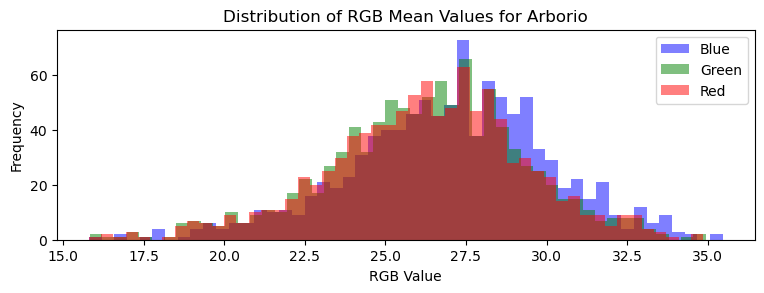

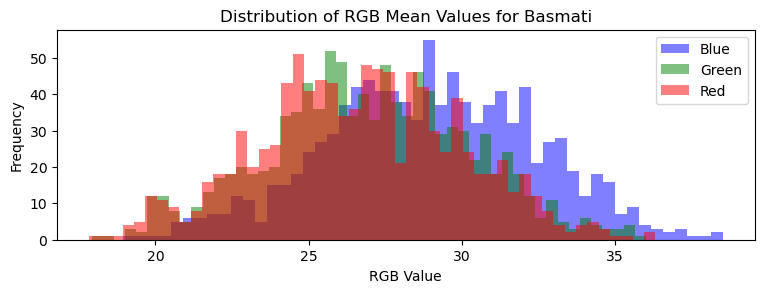

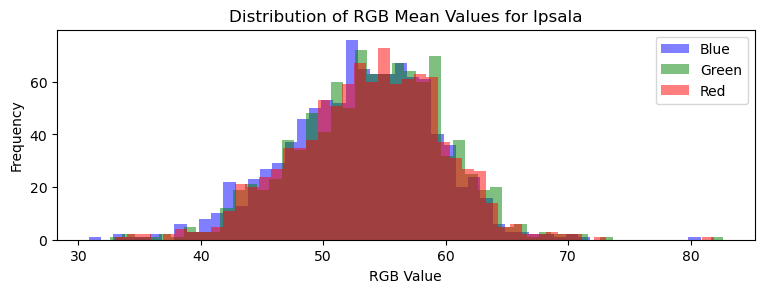

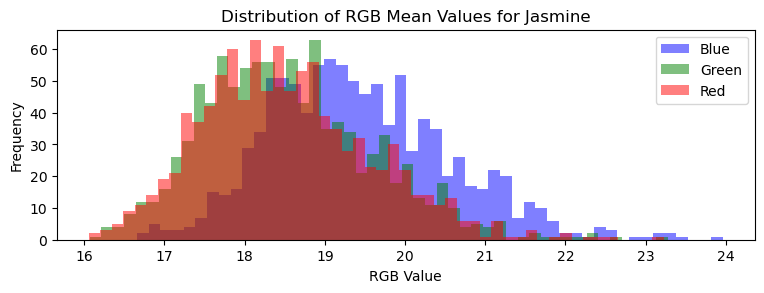

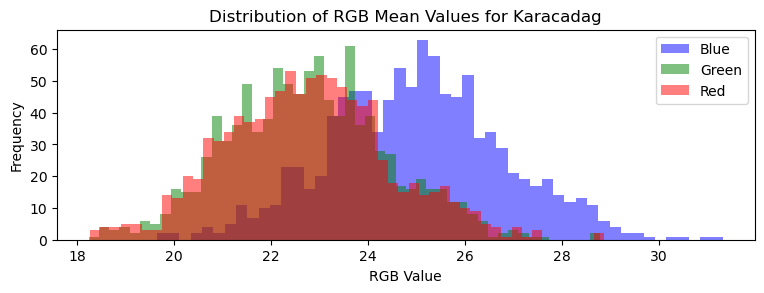

In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns


# Function to load images and extract features
def load_images(base_path, rice_types, sample_size=15000):
    
    features = []  # To store RGB means, standard deviations, and binary values
    label = []     # To store corresponding labels
    
    # First step: Collect raw RGB, standard deviation, and labels
    for rice_type in rice_types:
        folder_path = os.path.join(base_path, rice_type)
        images = os.listdir(folder_path)[:sample_size]
        print(f"Loading {rice_type} images... ({len(images)} found)")
        
        for img_name in images:
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            if img is None:  
                continue
            
            # Extract RGB means (raw RGB)
            rgb_means = np.mean(img, axis=(0, 1))  
            
            # Extract RGB standard deviations
            rgb_std = np.std(img, axis=(0, 1))  
            
            # Combine features
            feature = np.concatenate([rgb_means, rgb_std])
            features.append(feature)
            label.append(rice_type)
    
    # Convert to NumPy arrays
    features = np.array(features)
    label = np.array(label)
    
    # Second step: Calculate mean and apply binary transformation
    threshold = np.mean(features[:, :3], axis=0)  
    rgb_binary = (features[:, :3] > threshold).astype(int)  
    
    # Combine all features (RGB, standard deviation, and binary values)
    features = np.concatenate([features, rgb_binary], axis=1)  
    return features, label


# Define paths and rice types
base_path = "part_ii"  # Root folder containing rice type subfolders
rice_types = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]  # List of rice types

# Load data
features, label = load_images(base_path, rice_types)
print("Data loaded. Feature shape:", features.shape)


# Visualize the distribution of RGB mean values for each rice type
for rice_type in rice_types:
    type_features = features[label == rice_type]  
    
    plt.figure(figsize=(9, 6))
    plt.subplot(2, 1, 1)  
    plt.hist(type_features[:, 0], bins=50, color='blue', alpha=0.5, label='Blue')
    plt.hist(type_features[:, 1], bins=50, color='green', alpha=0.5, label='Green')
    plt.hist(type_features[:, 2], bins=50, color='red', alpha=0.5, label='Red')
    plt.title(f"Distribution of RGB Mean Values for {rice_type}")
    plt.xlabel("RGB Value")
    plt.ylabel("Frequency")
    plt.legend()

## 3. Necessary Functions

We apply necessary functions (plot_metrics, plot_confusion_matrix, evaluate_and_plot).

In [40]:


# Function to plot metrics (accuracy, precision, recall, F1-score)
def plot_metrics(metrics, values, title):
    plt.figure(figsize=(8, 5))
    bars = plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
    plt.title(f"Metrics for {title}")
    plt.ylim(0, 1)
    plt.ylabel("Score")
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
                 ha='center', va='bottom', fontsize=10)
    
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title, rice_types):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=rice_types, yticklabels=rice_types)
    plt.title(f"Confusion Matrix for {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Function to evaluate model, plot metrics, and confusion matrix
def evaluate_and_plot(model, X_train, X_test, y_train, y_test, feature_name, rice_types):
    # Train model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot metrics
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    values = [accuracy, precision, recall, f1]
    plot_metrics(metrics, values, f"{model.__class__.__name__} - {feature_name}")
    
    # Plot confusion matrix
    plot_confusion_matrix(conf_matrix, f"{model.__class__.__name__} - {feature_name}", rice_types)
    
    return accuracy, precision, recall, f1, conf_matrix

# Define feature groups
feature_groups = {
    "Raw RGB": (0, 3),              
    "Standard Deviation": (3, 6),  
    "Binary RGB": (6, 9),           
    "All Features": (0, 9)          
}

# Initialize models
models = {
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}


features_train, features_test, label_train, label_test = train_test_split(
    features, label, test_size=0.2, random_state=42)


## 4. Tables for comparisons
We compares model performance for classifying rice_types.


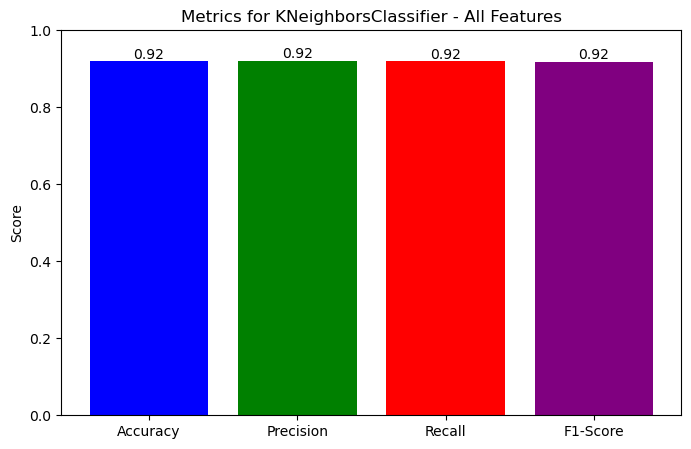

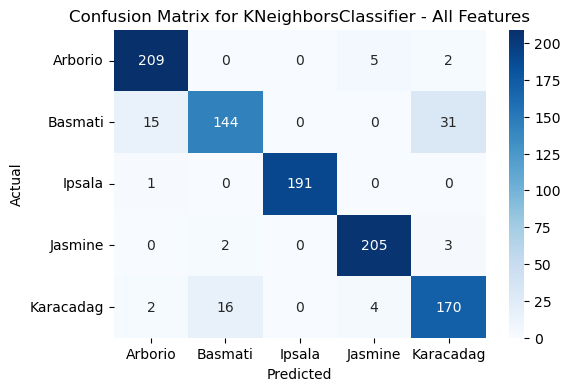

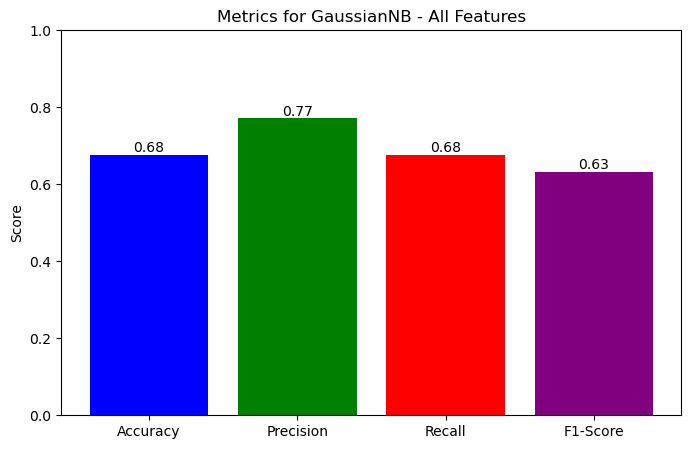

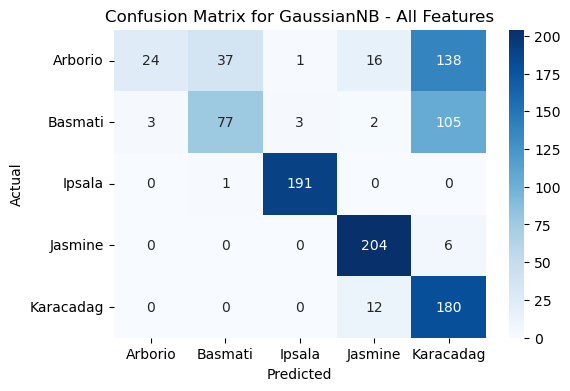

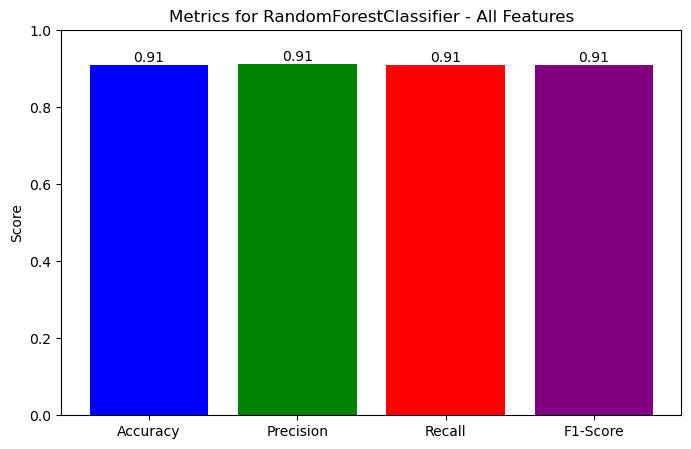

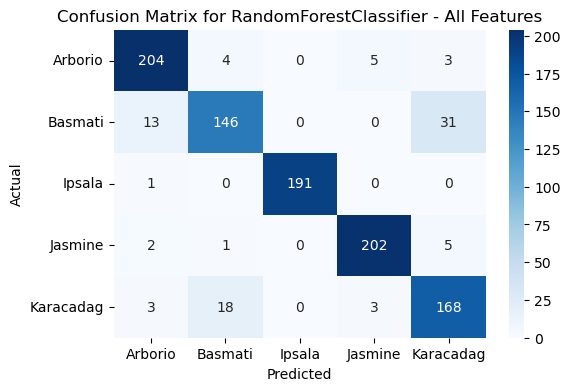

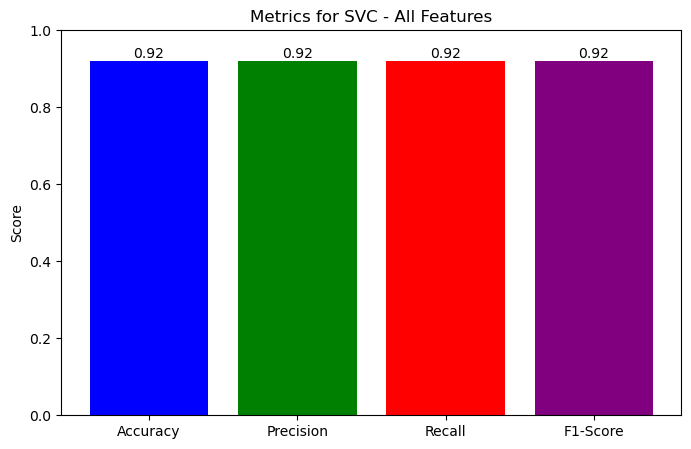

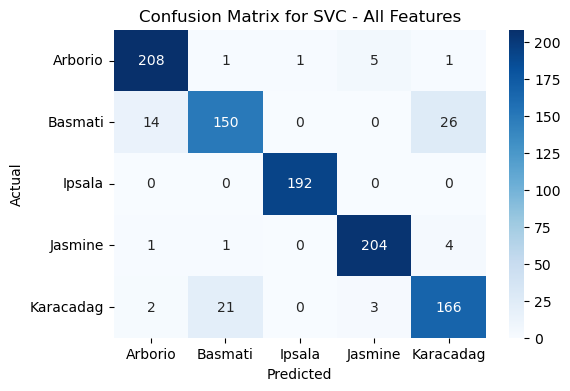

In [41]:
# Stage 1:  All Features with train test split(4 Tables)
for model_name, model in models.items():
    
    evaluate_and_plot(model, features_train, features_test, label_train, label_test, "All Features", rice_types)

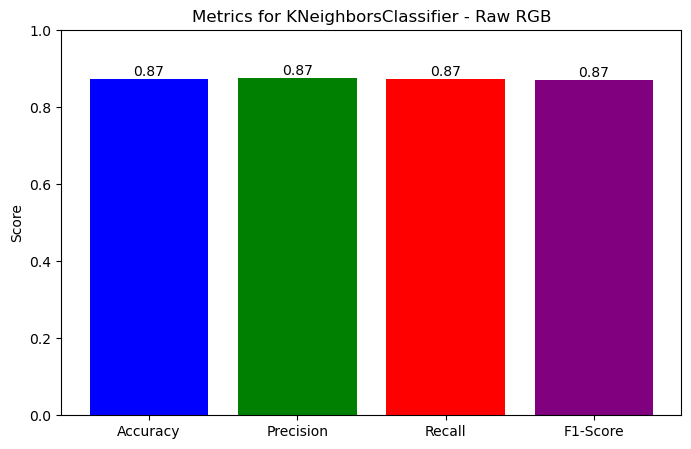

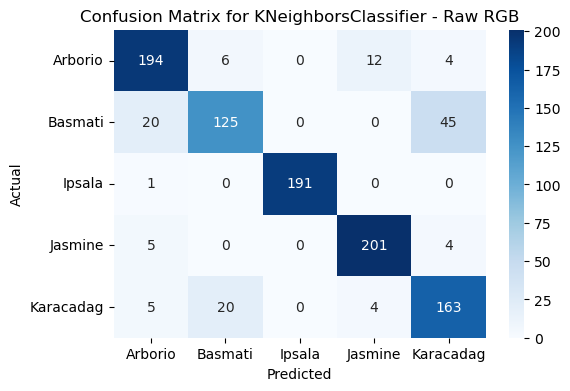

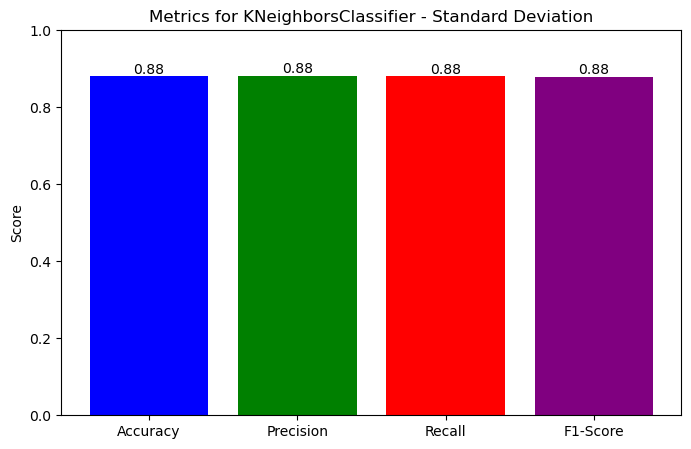

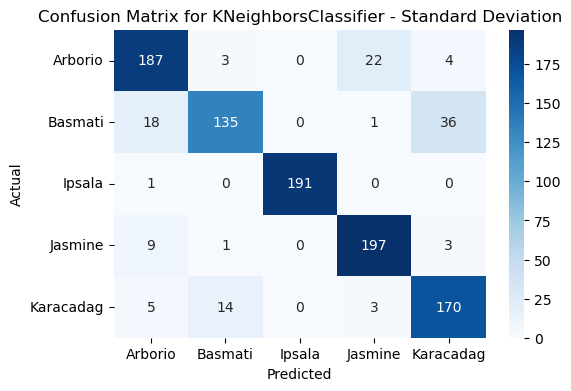

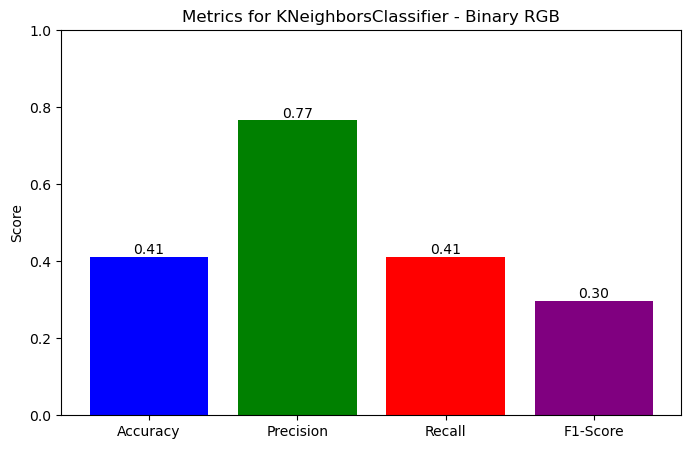

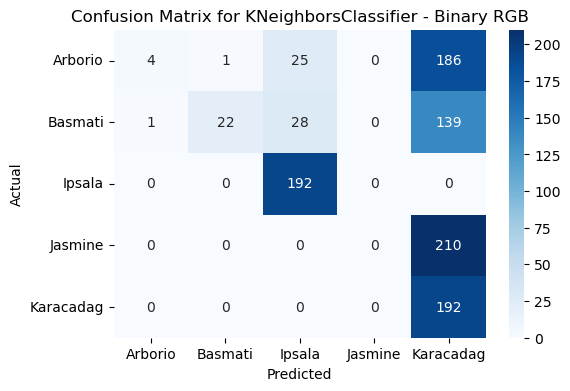

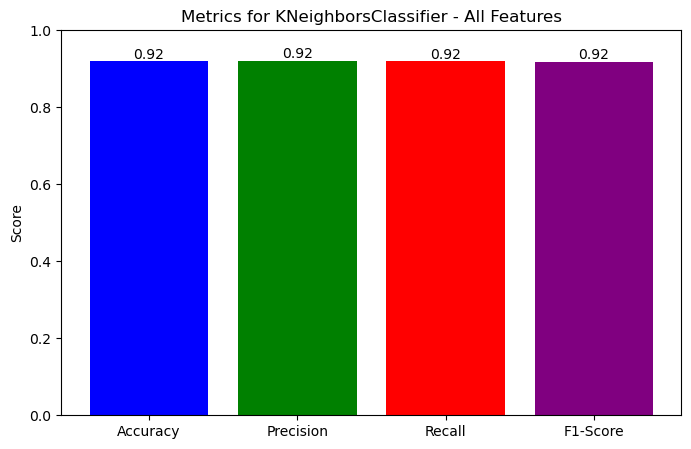

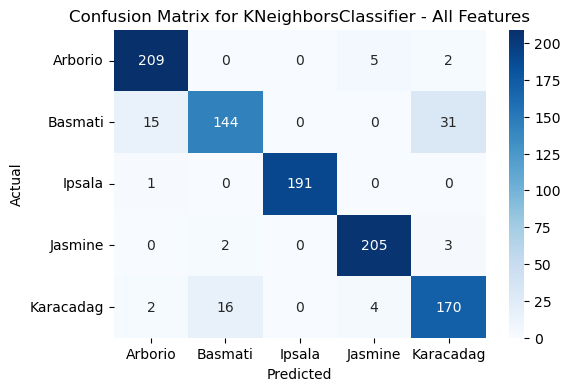

In [42]:
# Stage 2: Feature Groups for KNN (4 Tables)
for feature_name, (start_idx, end_idx) in feature_groups.items():
    
    X_train_group = features_train[:, start_idx:end_idx]
    X_test_group = features_test[:, start_idx:end_idx]
    
    evaluate_and_plot(models["kNN"], X_train_group, X_test_group, label_train, label_test, feature_name, rice_types)

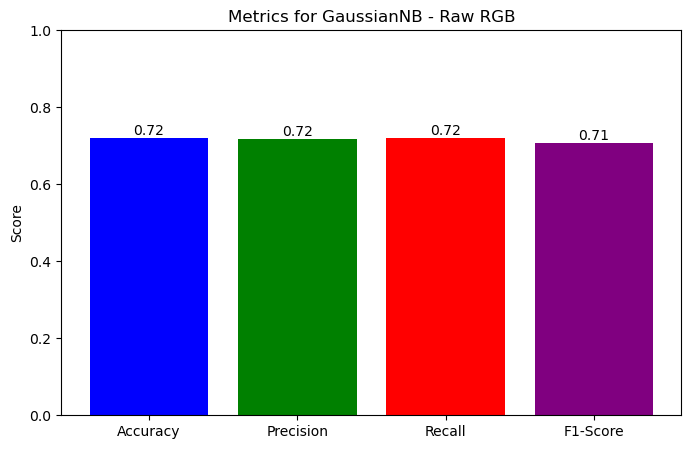

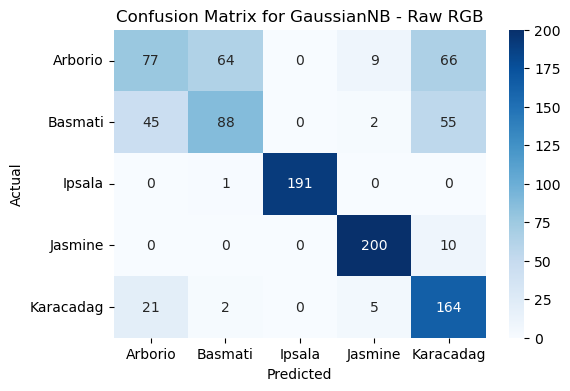

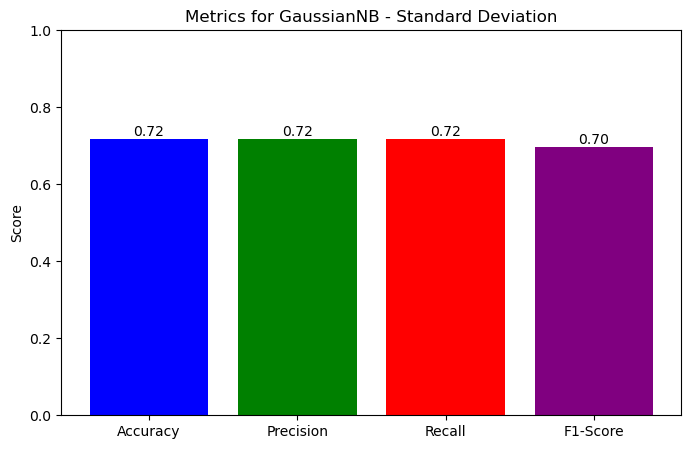

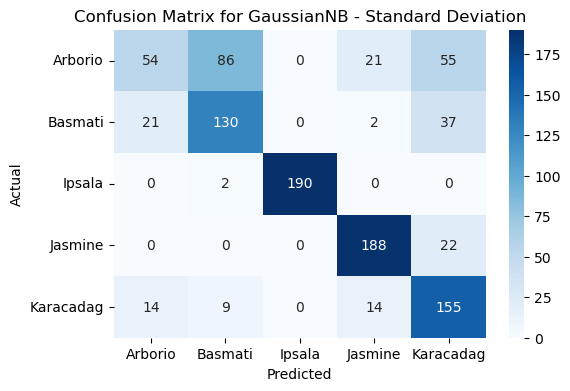

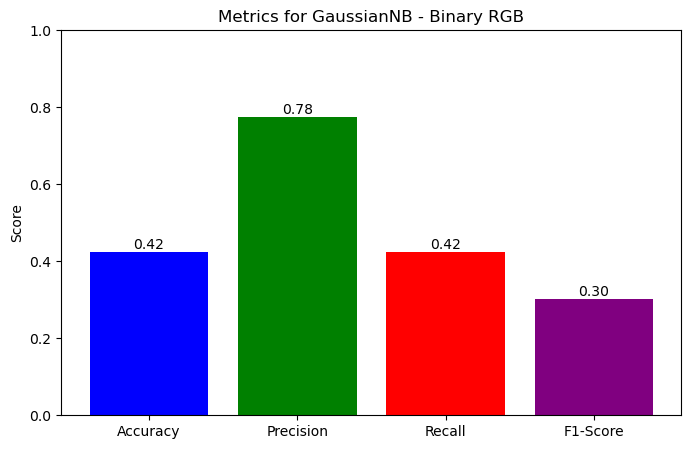

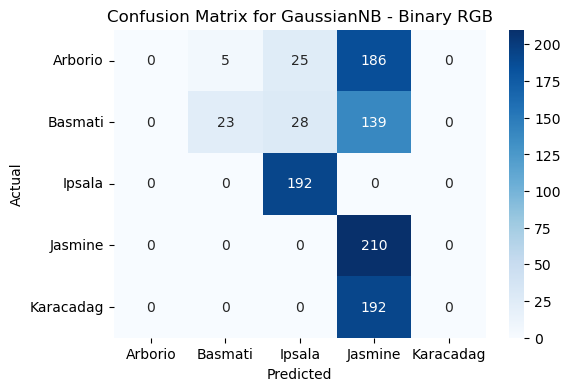

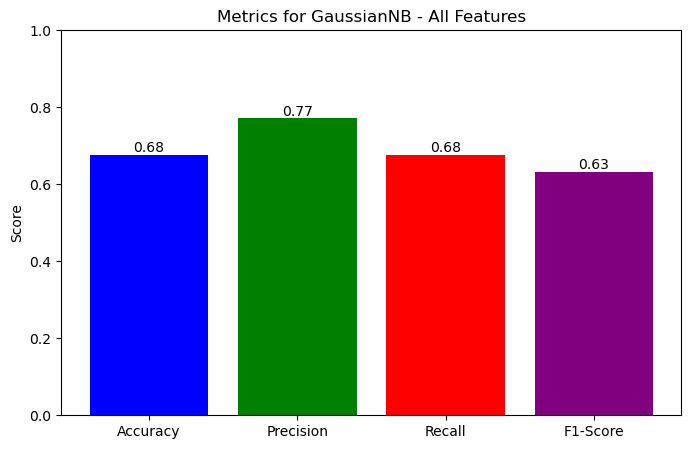

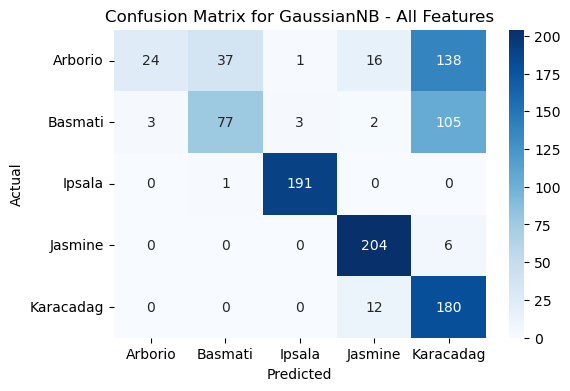

In [43]:
# Stage 3: Feature Groups for Naive Bayes (4 Tables)
for feature_name, (start_idx, end_idx) in feature_groups.items():
    
    X_train_group = features_train[:, start_idx:end_idx]
    X_test_group = features_test[:, start_idx:end_idx]
    
    evaluate_and_plot(models["Naive Bayes"], X_train_group, X_test_group, label_train, label_test, feature_name, rice_types)


Model: Random Forest, Feature Group: Raw RGB


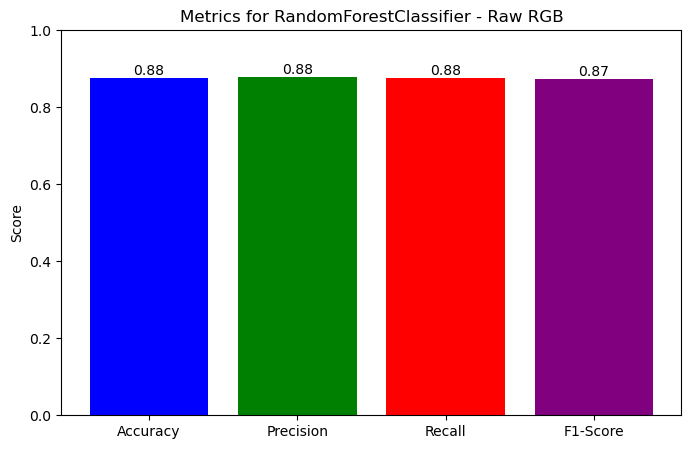

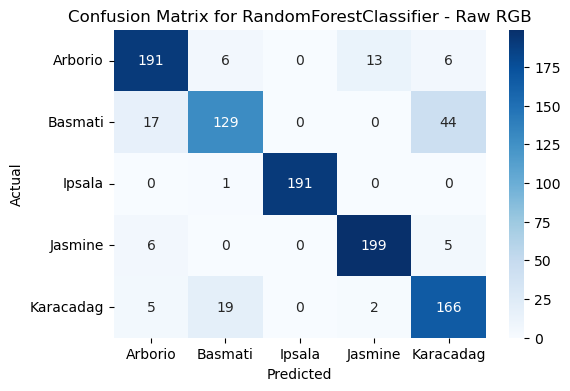


Model: Random Forest, Feature Group: Standard Deviation


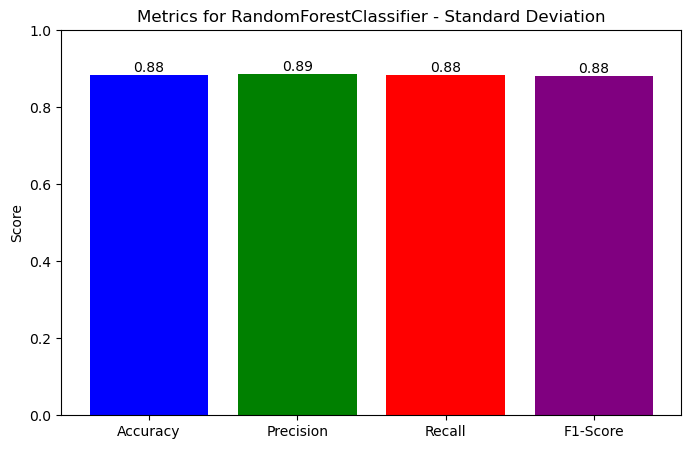

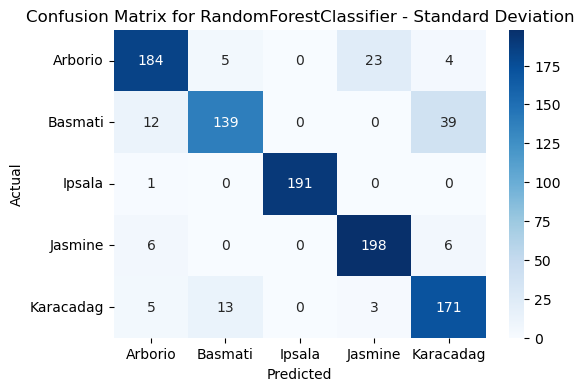


Model: Random Forest, Feature Group: Binary RGB


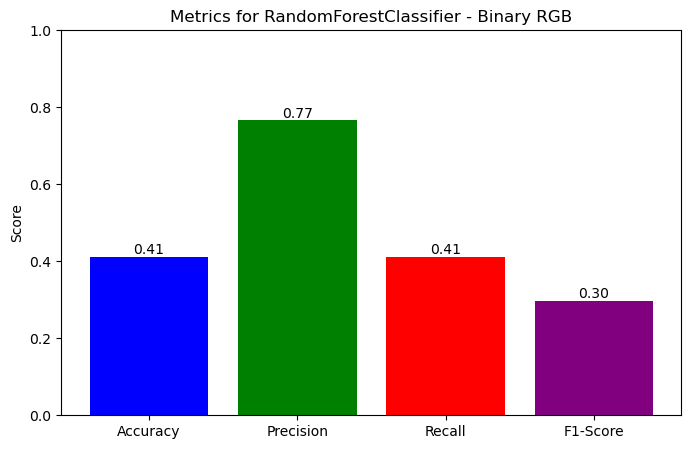

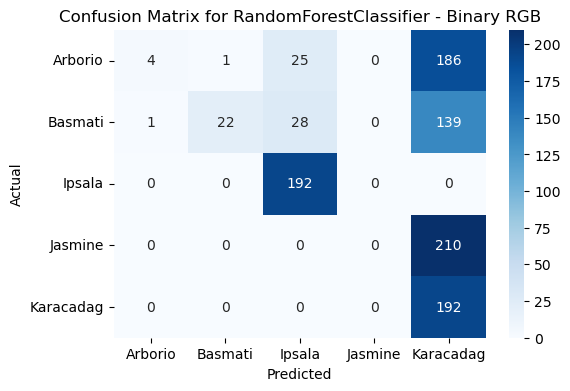


Model: Random Forest, Feature Group: All Features


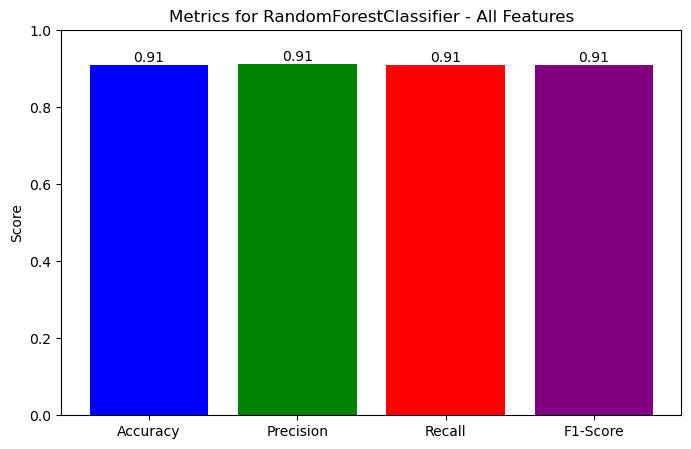

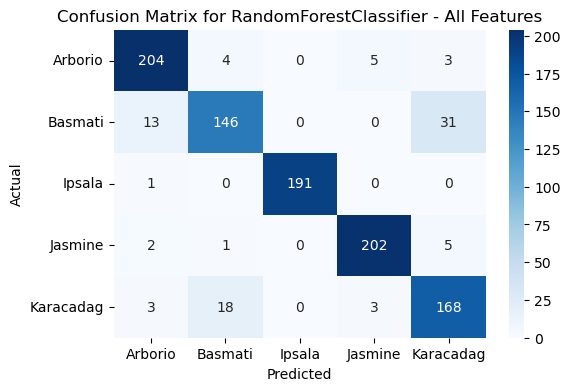

In [44]:
# Stage 4: Feature Groups for Random Forest (4 Tables)
for feature_name, (start_idx, end_idx) in feature_groups.items():
    print(f"\nModel: Random Forest, Feature Group: {feature_name}")
    X_train_group = features_train[:, start_idx:end_idx]
    X_test_group = features_test[:, start_idx:end_idx]
    
    evaluate_and_plot(models["Random Forest"], X_train_group, X_test_group, label_train, label_test, feature_name, rice_types)

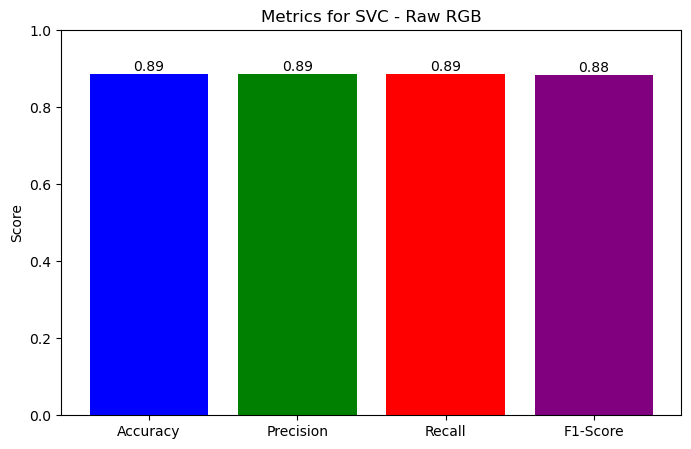

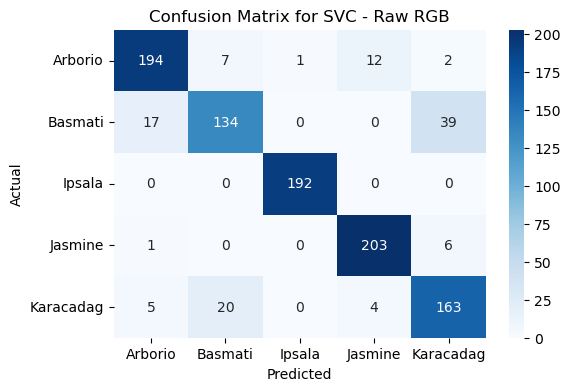

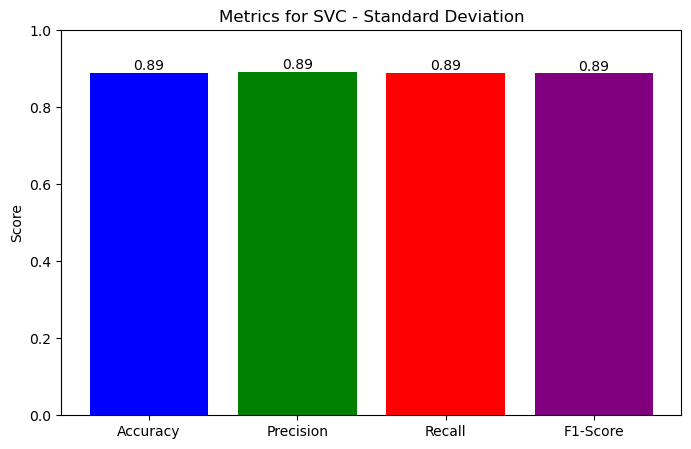

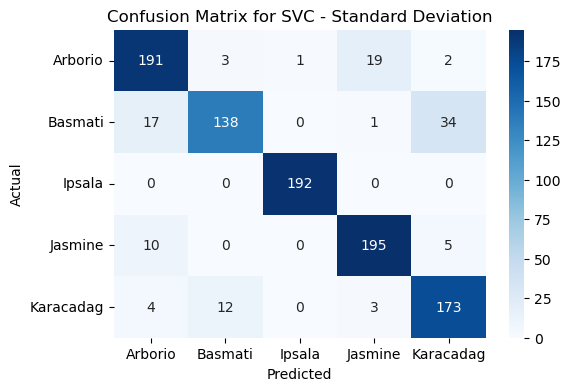

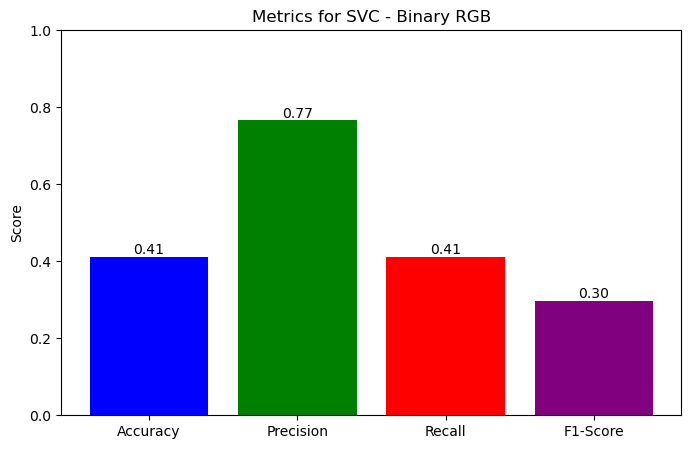

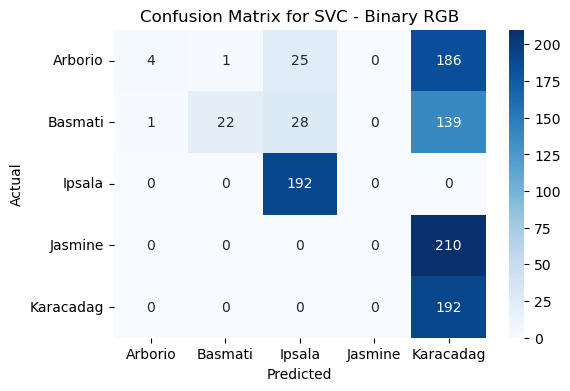

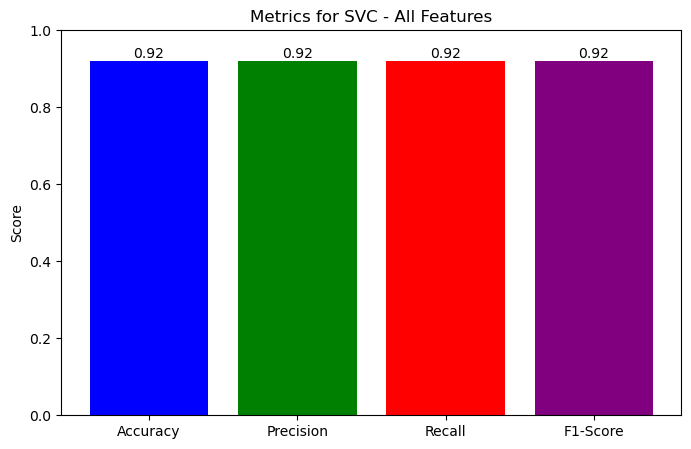

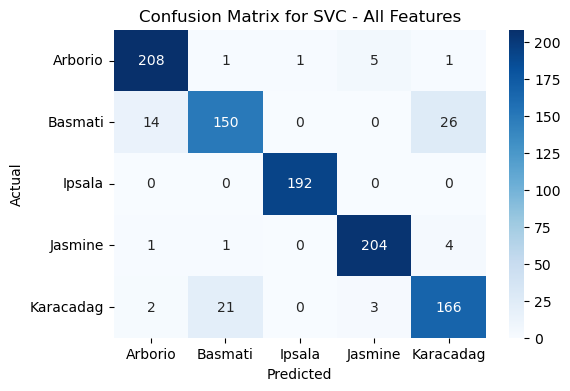

In [45]:
# Stage 5: Feature Groups for SVM (4 Tables)
for feature_name, (start_idx, end_idx) in feature_groups.items():
    
    X_train_group = features_train[:, start_idx:end_idx]
    X_test_group = features_test[:, start_idx:end_idx]
    
    evaluate_and_plot(models["SVM"], X_train_group, X_test_group, label_train, label_test, feature_name, rice_types)

## 5. Conclusion

In this study, we tested different ways to extract features and used various models to classify rice types. We compared their results to find the best method.